# Look Ma, No for Loops: Array Programming with NumPy

Python has a number of statistics libraries to use in data analyis:

1. statistics library is a built in for descriptive statistics. 
2. NumPy used for numerical computing, opotimized for working with single and multi-dimensional arrays. Used ndarrays. contains many [routines](https://numpy.org/doc/stable/reference/routines.statistics.html) for statistical analysis
3. SciPy used for scientific computing based on Numpy. Contains a scipy.stats for statistical analysis
4. pandas numerical computing based on NumPy. Uses Series for 1D data and DataFrame objects for 2D data
5. Matplotlib used for data visualization. Works well with NumPy, SciPy and pandas

The code below will focus on using NumPy for Array Programming. It follows this [tutorial](https://realpython.com/numpy-array-programming/) from realpython.com

## Intro to NumPy Arrays

There are three concepts that lend NumPy it's power:
1. Vectorization
2. Broadcasting
3. Indexing

## Getting into Shape: Intro to NumPy Arrays

The fundamental object of NumPy is the ndarray(numpy.array)

Below is code to generate a d 3-dimensional array with 36 elements

In [1]:
from statistics import mean
import numpy as np
#from timeit import timeit

# a 2 by 4 by 3 array
arr = np.arange(36).reshape(3, 4, 3) # a container with three 3x4grids
arr

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]]])

In [2]:
# the shape 
arr.shape

(3, 4, 3)

## What is Vectorization

Vectorization is expressing operations as occurring on entire arrays rather than on the individual elements within the array.  Vectorization replaces explicit loops in code

### Counting: Easy as 1, 2, 3
Example: Suppose you have a 1-D vector of boolean values for which you want to count the number of False to True transitions. Using for loops you could write a function

In [3]:
# First get random data
np.random.seed(444)
x = np.random.choice([False, True], size=100000)


In [4]:
def count_transitions(x):
    counter = 0
    
    for i in range(0, len(x)-1, 1):
        #print(f'i={i} and i+1={i+1}')
        if x[i] > x[i+1]:
            counter += 1
    return counter

c = count_transitions(x)
c

24984

In vectorized form this could be written as shown in the next cell.

In [5]:
np.count_nonzero(x[:-1] < x[1:])

24984

When compared to the count_transitions function the vectorized version is much quicker. Note the %timeit is known as python magic function. the -o notation allows the result of the magic function to be stored in a variable

In [6]:
t1 = %timeit -o count_transitions(x)

58.6 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
t2 = %timeit -o np.count_nonzero(x[:-1] < x[1:])

6.56 µs ± 99.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [8]:
#t1 best time is over 8800 times slower than the best 
t1.best/t2.best

8947.241059450862

In [9]:
0.1*mean(t1.all_runs)/0.00001*mean(t2.all_runs)

3843.933469002647

### Buy Low Sell High Example

Given a stock’s price history as a sequence, and assuming that you are only allowed to make one purchase and one sale, what is the maximum profit that can be obtained? For example, given prices = (20, 18, 14, 17, 20, 21, 15), the max profit would be 7, from buying at 14 and selling at 21.

In [25]:
import matplotlib.pyplot as plt

def profits(prices):
    max_px = 0
    min_px = prices[0]
    for px in prices:
        min_px = min(px, min_px)
        max_px = max(max_px, px - min_px)
        print(f'px = {px} min_px = {min_px} max_px = {max_px}')
    return max_px

prices = [21, 18, 14, 17, 20, 21, 15, 10]
profits(prices)

px = 21 min_px = 21 max_px = 0
px = 18 min_px = 18 max_px = 0
px = 14 min_px = 14 max_px = 0
px = 17 min_px = 14 max_px = 3
px = 20 min_px = 14 max_px = 6
px = 21 min_px = 14 max_px = 7
px = 15 min_px = 14 max_px = 7
px = 10 min_px = 10 max_px = 7


7

In [26]:
# create a mostly NAN array with a few 'turning points'
prices = np.full(100, fill_value=np.nan)
prices[[0, 25, 60, -1]] = [80., 30., 75., 50.]

# linearly interpolate the missing values and add some noise
x = np.arange(len(prices))
is_valid = ~np.isnan(prices)# Boolean vector checking if prices is NaN
prices = np.interp(x=x, xp=x[is_valid], fp=prices[is_valid]) #interpolates between the non valid prices
prices += np.random.randn(len(prices)) * 2 #adding noise to the trends

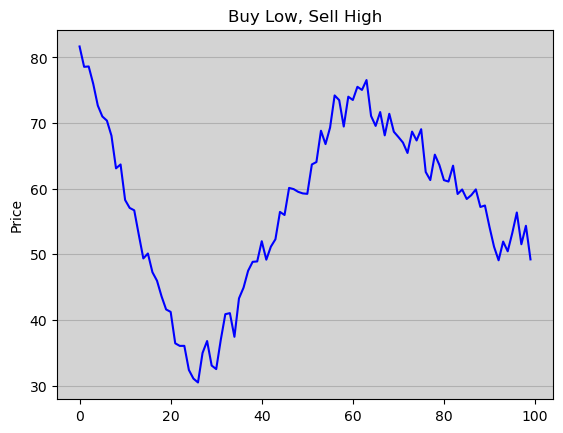

NumPs universal functions all have an accumulate() method. This means you can find the difference between each price and a running minimum (element-wise), and then take the max of theis sequence

In [51]:
def profit_with_numpy(prices):
    """Price minus cumulative minimum price, element-wise"""
    prices = np.asarray(prices)
    return np.max(prices - np.minimum.accumulate(prices))

In [67]:
prf = profit_with_numpy(prices)
#finding the indexes of the minimum value and maximum value that comes after the global minimum
index_min = np.argmin(prices)
index_max = np.argmax(prices[index_min:]) + index_min

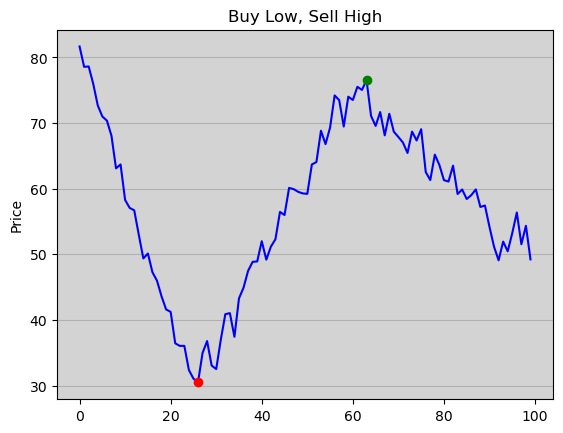

In [68]:
fig, ax = plt.subplots()
ax.set_title('Buy Low, Sell High')
ax.plot(x, prices, color='blue')
ax.plot(index_min, prices[index_min], marker = 'o', color='red')
ax.plot(index_max, prices[index_max], marker = 'o', color='green')
ax.set_ylabel('Price')
ax.grid(axis='y')
ax.set_facecolor('lightgrey')